In [1]:
#import required libraries for ETL
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\ASUS\\Documents\\data_bank\\Diabetes_dataset\\diabetes_dataset.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#importing models for decision tree clissification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
#set goal (target)
target = df.pop("Outcome")

target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
#observe that the outcome column is out from the rest of the data, this becomes the features
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
#define the rest of the features
features = df.values
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
# Splitting the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

In [12]:
#inititialising the DesicionTreeClassifier
model = DecisionTreeClassifier(random_state=45)

model

DecisionTreeClassifier(random_state=45)

In [13]:
#train the model
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=45)

In [14]:
# Making predictions on the test set
y_predict = model.predict(x_test)

y_predict

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [15]:
#model accuracy
accuracy= accuracy_score(y_test, y_predict)

accuracy

0.6883116883116883

In [16]:
#Classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       104
           1       0.52      0.58      0.55        50

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.69       154



In [17]:
#confusion Matrix
confu_mat = confusion_matrix(y_test, y_predict)
confu_mat

array([[77, 27],
       [21, 29]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Diabetes Classification')

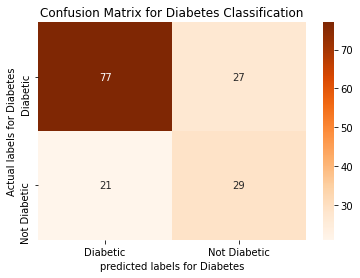

In [18]:
#show heatmap
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Oranges", xticklabels=['Diabetic', 'Not Diabetic'], yticklabels=['Diabetic', 'Not Diabetic'])
plt.xlabel("predicted labels for Diabetes" )
plt.ylabel("Actual labels for Diabetes")
plt.title("Confusion Matrix for Diabetes Classification")

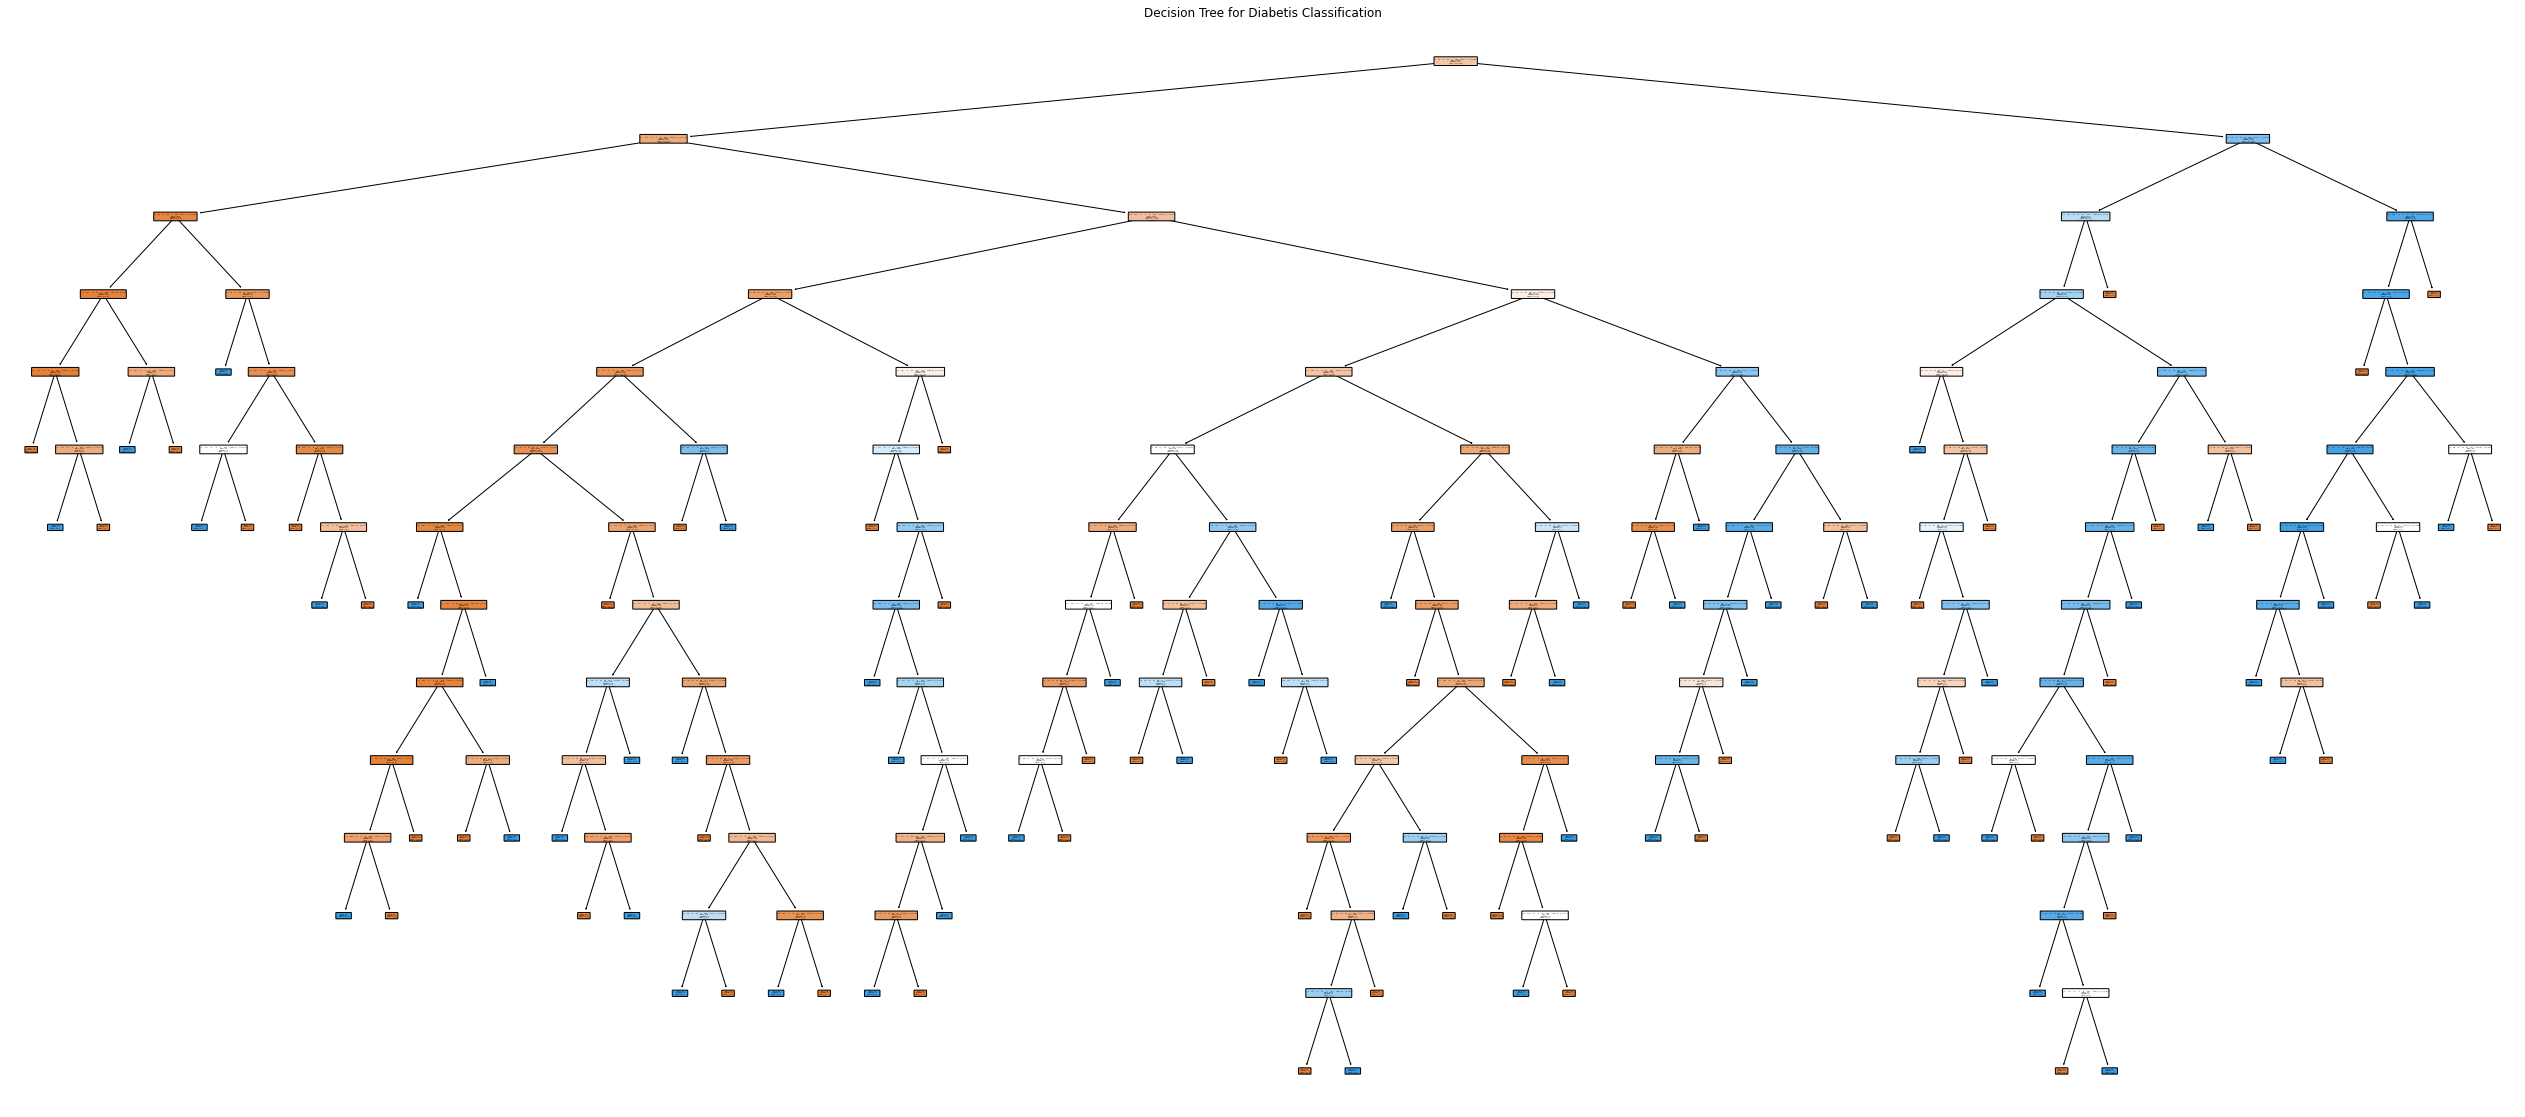

In [19]:
#plotting the decision tree
plt.figure(figsize=(45,20))
plot_tree(model, filled= True, feature_names= features, class_names=["Diabetic", "Not Diabetic"], rounded= True )
plt.title("Decision Tree for Diabetis Classification")
plt.show()


Note : the Decision Tree generates a visualization of the decision tree, with nodes representing decision splits based on features,
    helping to illustrate how the tree determines diabetic or non diabetic.